# House Prices Advanced Regression Techniques

_create by [Austin Poor](https://www.kaggle.com/austinpoor)_

* [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)
* [Github Repo](https://github.com/a-poor/kaggle-house-prices/tree/main)

In [1]:
import sys
from pathlib import Path
DATA_DIR = Path("../input")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df_train = pd.read_csv(DATA_DIR / "train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
def clean_df(df:pd.DataFrame) -> pd.DataFrame:
    category_columns = ['MSSubClass',
        'MSZoning','Street','Alley','LotShape','LandContour',
        'Utilities','LotConfig','LandSlope','Neighborhood',
        'Condition1','Condition2','BldgType','HouseStyle',
        'OverallQual','OverallCond','RoofStyle','RoofMatl',
        'Exterior1st','Exterior2nd','MasVnrType','ExterQual',
        'ExterCond','Foundation','BsmtQual','BsmtCond',
        'BsmtExposure','BsmtFinType2','Heating','HeatingQC',
        'CentralAir','Electrical','KitchenQual','Functional',
        'FireplaceQu','GarageType','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
        'SaleType','SaleCondition']
    for c in category_columns:
        df[c] = pd.Categorical(df[c])
    return df

In [5]:
df_train = clean_df(df_train)
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
999,1000,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,206000
200,201,20,RM,80.0,8546,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,140000
366,367,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,159000
858,859,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Family,152000
842,843,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,174900
132,133,20,RL,75.0,7388,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,150750
734,735,20,RL,NaN,8978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Family,108000
1120,1121,30,RM,59.0,8263,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,118400
1335,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
484,485,20,RL,NaN,7758,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,132500


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-nu

__Sort Columns by $|CORR(column)|$__

In [8]:
sales_corr = df_train.corr()["SalePrice"]\
    .reset_index()
sales_corr.columns = ["colname","sales_corr"]
sales_corr["abs_corr"] = np.abs(sales_corr["sales_corr"])
sales_corr = sales_corr.set_index("colname")
sales_corr = sales_corr.join(colvariance)
sales_corr.sort_values(
    ["abs_corr","col_variance"],
    ascending=False
)

,sales_corr,abs_corr,col_variance
colname,,,
SalePrice,1.000000,1.000000,6.311111e+09
GrLivArea,0.708624,0.708624,2.761296e+05
GarageCars,0.640409,0.640409,5.584797e-01
GarageArea,0.623431,0.623431,4.571251e+04
TotalBsmtSF,0.613581,0.613581,1.924624e+05
1stFlrSF,0.605852,0.605852,1.494501e+05
FullBath,0.560664,0.560664,3.035082e-01
TotRmsAbvGrd,0.533723,0.533723,2.641903e+00
YearBuilt,0.522897,0.522897,9.122154e+02


__Sort Columns by $Var(column)$__

In [9]:
sales_corr.sort_values(
    ["col_variance","abs_corr"],
    ascending=False
)

,sales_corr,abs_corr,col_variance
colname,,,
SalePrice,1.000000,1.000000,6.311111e+09
LotArea,0.263843,0.263843,9.962565e+07
GrLivArea,0.708624,0.708624,2.761296e+05
MiscVal,-0.021190,0.021190,2.461381e+05
BsmtFinSF1,0.386420,0.386420,2.080255e+05
BsmtUnfSF,0.214479,0.214479,1.952464e+05
TotalBsmtSF,0.613581,0.613581,1.924624e+05
2ndFlrSF,0.319334,0.319334,1.905571e+05
Id,-0.021917,0.021917,1.777550e+05


In [56]:
from sklearn import impute
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

In [127]:
from xgboost import XGBRegressor

In [87]:
df = pd.get_dummies(df_train,drop_first=True)
X, y = df.drop("SalePrice",1), df["SalePrice"].values

imp = impute.SimpleImputer(strategy="median")
X = imp.fit_transform(X)

m = linear_model.LinearRegression().fit(X,y)
m.score(X,y)

0.9377120553973618

In [115]:
def kfold_index_gen(N: int, k: int):
    w = N / k
    fold_info = pd.DataFrame({
        "indx": np.arange(N)
        })\
        .sample(frac=1.)\
        .reset_index(drop=True)
    fold_info["fold"] = (np.arange(N) // w).astype(int)
    for fold in range(k):
        train = fold_info[fold_info.fold != fold].indx
        test  = fold_info[fold_info.fold == fold].indx
        yield train.values, test.values

def kfold_data(X, y, k:int):
    N = len(X)
    for train_i, test_i in kfold_index_gen(N,k):
        yield X[train_i], X[test_i], y[train_i], y[test_i]

In [116]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 274), (365, 274), (1095,), (365,))

In [117]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1095, 274), (1095,), (137, 2, 274), (137, 2))

In [150]:
# Set parameters
models = {
    "Linear Regression": linear_model.LinearRegression(),
    "LASSO Regression": linear_model.Lasso(),
    "Decision Tree": tree.DecisionTreeRegressor(),
    "Random Forrest": ensemble.RandomForestRegressor(),
    "Gradient Boosted": ensemble.GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}
K = 8

# Split into Train/Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y)

# Run the loop
print(f"Training {len(models)} models on {K} folds")
scores = {}
for mname, m in models.items():
    print("Training model:", mname)
    scores[mname] = []
    for k, (X_train, X_val, y_train, y_val) in enumerate(kfold_data(X_train,y_train,K)):
        m.fit(X_train,y_train)
        s = m.score(X_val,y_val)
        scores[mname].append(s)
        print(f"[{mname:17} | {k}] {s:.4f}")
    print()

print("Results..")
for mname, m in models.items():
    print(f"[{mname:17}] μ={np.mean(scores[mname]):.4f} σ={np.std(scores[mname]):.4f}")

Training 6 models on 8 folds
Training model: Linear Regression
[Linear Regression | 0] 0.0966
[Linear Regression | 1] -0.2483
[Linear Regression | 2] 0.4440
[Linear Regression | 3] 0.4381
[Linear Regression | 4] 0.7579
[Linear Regression | 5] 0.8921
[Linear Regression | 6] 0.9111
[Linear Regression | 7] 0.3165

Training model: LASSO Regression
[LASSO Regression  | 0] 0.9250
[LASSO Regression  | 1] 0.8922
[LASSO Regression  | 2] 0.8829
[LASSO Regression  | 3] 0.4621
[LASSO Regression  | 4] 0.8436
[LASSO Regression  | 5] 0.8956
[LASSO Regression  | 6] 0.8613
[LASSO Regression  | 7] 0.8855

Training model: Decision Tree
[Decision Tree     | 0] 0.6147
[Decision Tree     | 1] 0.6311
[Decision Tree     | 2] 0.5361
[Decision Tree     | 3] 0.7265
[Decision Tree     | 4] 0.8289
[Decision Tree     | 5] 0.6726
[Decision Tree     | 6] 0.7256
[Decision Tree     | 7] 0.6589

Training model: Random Forrest
[Random Forrest    | 0] 0.8197
[Random Forrest    | 1] 0.7109
[Random Forrest    | 2] 0.8836
[R

In [147]:
import itertools as it

In [154]:
results = pd.DataFrame(it.chain(*[[{"model":k,"score":n} for n in v] for k, v in scores.items()]))
results.head()

,model,score
0,Linear Regression,0.096557
1,Linear Regression,-0.248348
2,Linear Regression,0.444047
3,Linear Regression,0.438124
4,Linear Regression,0.757945


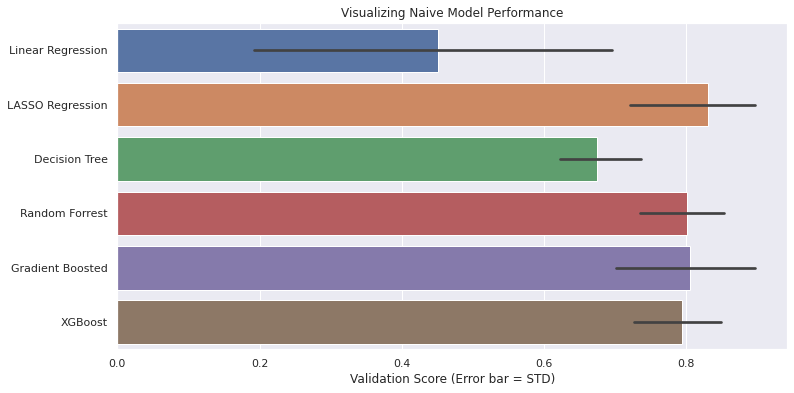

In [170]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(
    x="score",
    y="model",
    data=results,
    orient="h",
    # ci="sd",
)
plt.title("Visualizing Naive Model Performance")
plt.xlabel("Validation Score (Error bar = STD)")
plt.ylabel("");

In [173]:
model_selection.GridSearchCV?

Init signature:
model_selection.GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    iid='deprecated',
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_

## Perform Grid Search on Some of the Models

In [209]:
import time

In [201]:
models = {}
param_grids = {}

In [203]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y)

### LASSO Regression

In [210]:
# Set the Parameters
model_name = "lasso"
param_grids[model_name] = {
    "alpha":np.linspace(0.001,5,10),
    "max_iter":10 ** np.arange(2,8,2)
}

# Build GridSearchCV Model
models[model_name] = model_selection.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid=param_grids["lasso"],
    scoring="r2",
    n_jobs=-1,
    cv=5,
    refit=True,
    verbose=10
)

# Fit the Model
models[model_name].fit(X_train,y_train)

# Print the results
time.sleep(0.1)
print()
print(f"\"{model_name:>10s}\" => BEST SCORE: {models[model_name].best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.3min

"     lasso" => BEST SCORE: 0.9003
[Parallel(n_jobs=-1)

### Random Forrest

In [213]:
model_name = "random_forest"
param_grids[model_name] = {
    "n_estimators": [10,50,100,500,1_000,5_000,10_000],
    "max_depth": [1,3,5,7,10,20,None],
    "min_samples_split":[1,2,5,10,20],
    "min_samples_leaf":[1,2,5],
    "max_features":["auto","sqrt","log2"],
    "max_leaf_nodes":[None,],
    "min_impurity_decrease":[0,0.1,0.25],
    "max_samples":[None,0.2,0.5,0.8,0.9,1.0],
    "max_samples":[0.5,0.8,1.0],
}
models[model_name] = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestRegressor(n_jobs=1,verbose=False),
    param_grid=param_grids[model_name],
    scoring="r2",
    n_jobs=-1,
    cv=5,
    refit=True,
    verbose=10
)
models[model_name].fit(X_train,y_train)
time.sleep(0.1)
print()
print("\"{model_name:>17s}\"BEST SCORE: {models[model_name].best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1955s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0452s.) Setting batch_size=4.


ValueError: Invalid parameter alpha for estimator RandomForestRegressor(n_jobs=1, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

### XGBoost

In [ ]:
model_name = "xgbr"
param_grids[model_name] = {
    "n_estimators": 10 ** np.arange(6),
    "max_depth": [3,4,5,6,7,8,9,10],
    "learning_rate": np.linspace(1e-5,0.3,5),
    "subsample": np.linspace(0.5,1.0,5),
    "colsample_bytree": np.linspace(0.5,1.0,5),
    "lambda": np.linspace(0,1.0,5),
    "alpha": np.linspace(0,1.0,5),
}
models[model_name] = model_selection.GridSearchCV(
    estimator=XGBRegressor(n_jobs=1,silent=1),
    param_grid=param_grids[model_name],
    scoring="r2",
    n_jobs=-1,
    cv=5,
    refit=True,
    verbose=10
)
models[model_name].fit(X_train,y_train)
print("\"{model_name:>17s}\"BEST SCORE: {models[model_name].best_score_:.4f}")